# Logistic Regression
Logistic Regression is a Machine Learning algorithm which is used for the classification problems, it is a predictive analysis algorithm and based on the concept of probability.

Logistic regression uses the concept of predictive modeling as regression; therefore, it is called logistic regression, but is used to classify samples; Therefore, it falls under the classification algorithm.

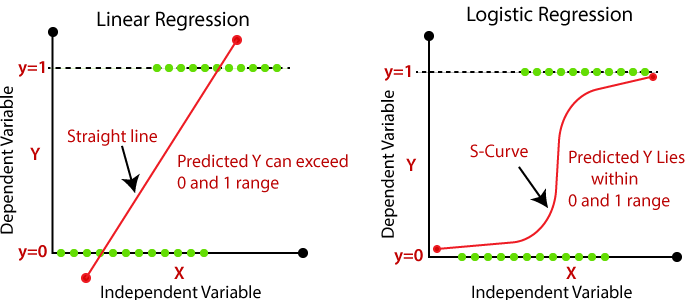

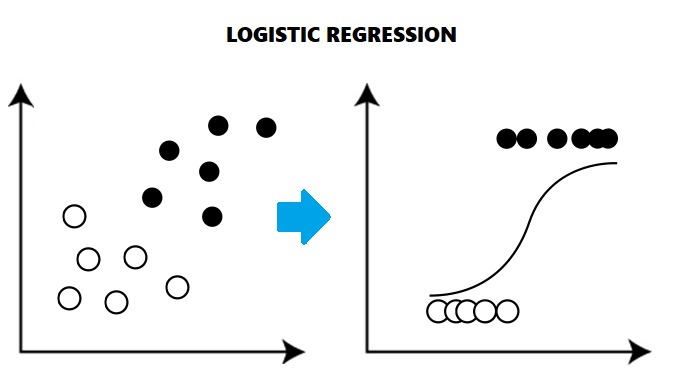

We can call a Logistic Regression a Linear Regression model but the Logistic Regression uses a more complex cost function, this cost function can be defined as the ‘Sigmoid function’ or also known as the ‘logistic function’ instead of a linear function.
The hypothesis of logistic regression tends it to limit the cost function between 0 and 1. Therefore linear functions fail to represent it as it can have a value greater than 1 or less than 0 which is not possible as per the hypothesis of logistic regression.


# Sigmoid Function
In order to map predicted values to probabilities, we use the Sigmoid function. The function maps any real value into another value between 0 and 1. In machine learning, we use sigmoid to map predictions to probabilities.

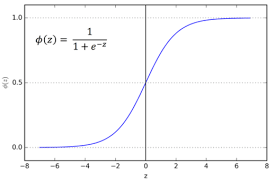
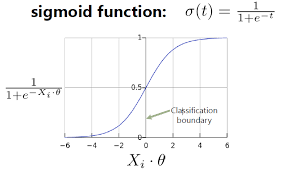

# Decision Boundary
We expect our classifier to give us a set of outputs or classes based on probability when we pass the inputs through a prediction function and returns a probability score between 0 and 1.
For Example, We have 2 classes, let’s take them like cats and dogs(1 — dog , 0 — cats). We basically decide with a threshold value above which we classify values into Class 1 and of the value goes below the threshold then we classify it in Class 2
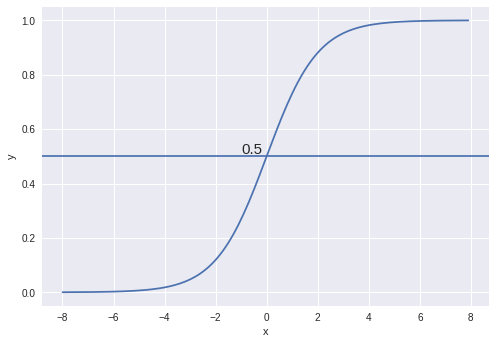

As shown in the above graph we have chosen the threshold as 0.5, if the prediction function returned a value of 0.7 then we would classify this observation as Class 1(DOG). If our prediction returned a value of 0.2 then we would classify the observation as Class 2(CAT).

# Why don’t we use `Mean Squared Error as a cost function in Logistic Regression?
Mean Squared Error, commonly used for linear regression models, isn't convex for logistic regression. This is because the logistic function isn't always convex. The logarithm of the likelihood function is however always convex.



# Cost Function
We learnt about the cost function J(θ) in the Linear regression, the cost function represents optimization objective i.e. we create a cost function and minimize it so that we can develop an accurate model with minimum error.

If we try to use the cost function of the linear regression in ‘Logistic Regression’ then it would be of no use as it would end up being a non-convex function with many local minimums, in which it would be very difficult to minimize the cost value and find the global minimum.
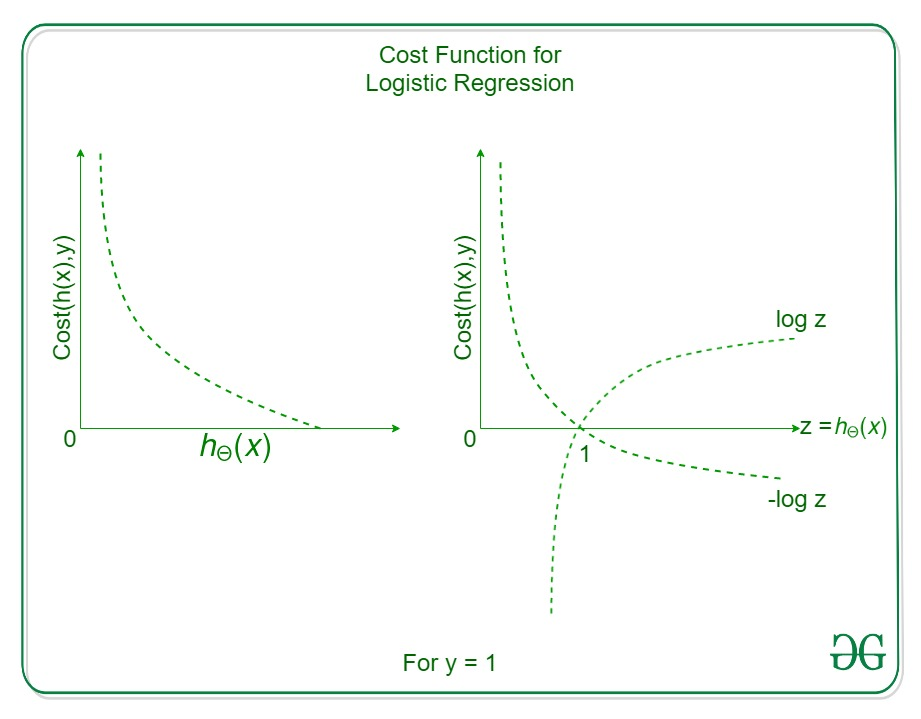


# Log Loss
Log Loss is the most important classification metric based on probabilities. It’s hard to interpret raw log-loss values, but log-loss is still a good metric for comparing models. For any given problem, a lower log loss value means better predictions.

Mathematical interpretation:

Log Loss is the negative average of the log of corrected predicted probabilities for each instance.
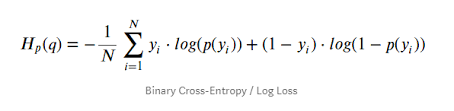

# Gradient Descent
Now the question arises, how do we reduce the cost value. Well, this can be done by using Gradient Descent. The main goal of Gradient descent is to minimize the cost value. i.e. min J(θ).
Now to minimize our cost function we need to run the gradient descent function on each parameter i.e.


 


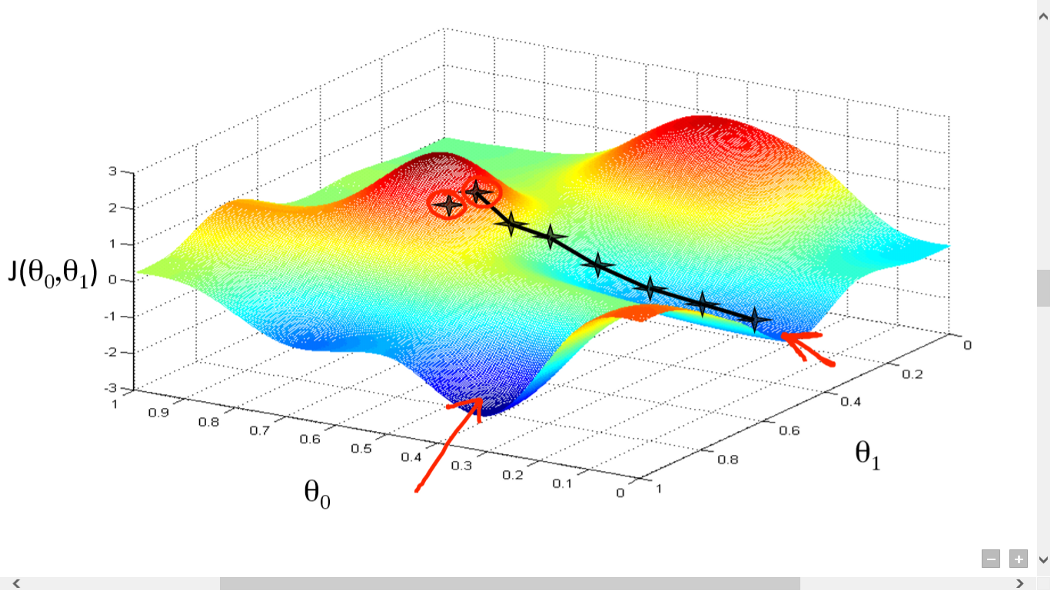



# Types of Logistic Regression
Generally, logistic regression means binary logistic regression having binary target variables, but there can be two more categories of target variables that can be predicted by it. Based on those number of categories, Logistic regression can be divided into following types −


# Binary or Binomial
In such a kind of classification, a dependent variable will have only two possible types either 1 and 0. For example, these variables may represent success or failure, yes or no, win or loss etc.

# Multinomial
In such a kind of classification, dependent variable can have 3 or more possible unordered types or the types having no quantitative significance. For example, these variables may represent “Type A” or “Type B” or “Type C”.

# Ordinal
In such a kind of classification, dependent variable can have 3 or more possible ordered types or the types having a quantitative significance. For example, these variables may represent “poor” or “good”, “very good”, “Excellent” and each category can have the scores like 0,1,2,3.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('C:/Users/deshm/Desktop/dataml/heart.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


<AxesSubplot:>

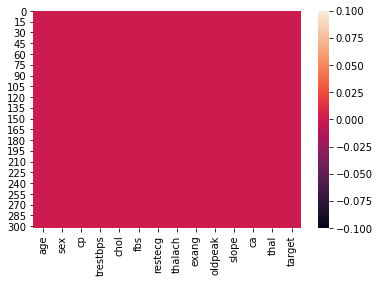

In [3]:
sns.heatmap(df.isnull())

In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\deshm\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

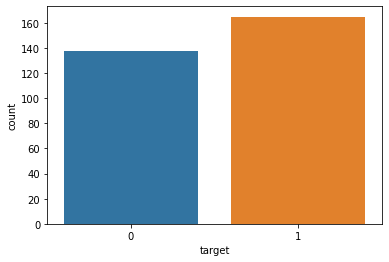

In [5]:
sns.countplot(df['target'])

# Feature Selection


<AxesSubplot:>

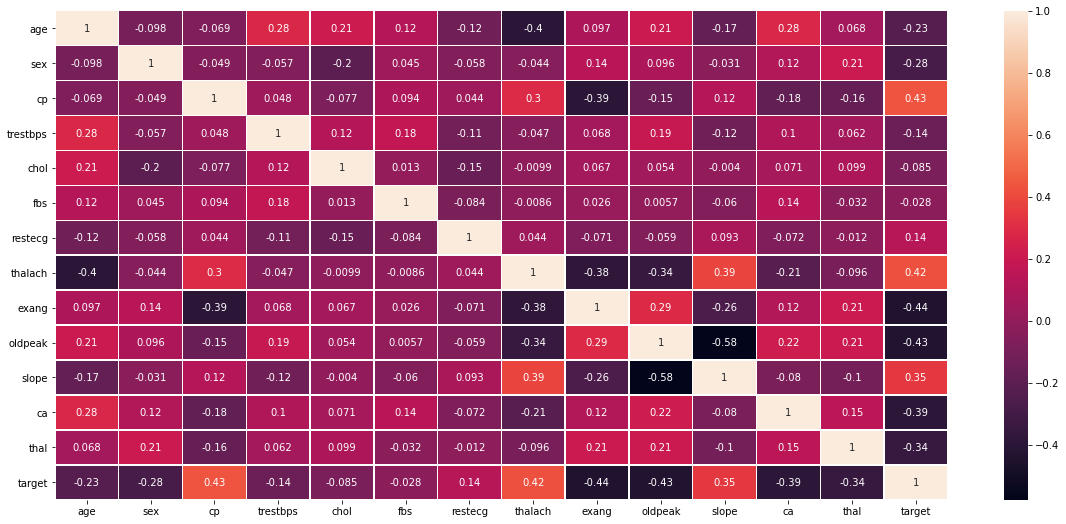

In [6]:
plt.figure(figsize=(20,9))
sns.heatmap(df.corr(),annot=True,linewidths=0.4,)

In [7]:
X =df.drop(columns = 'target', axis=1)
Y = df['target']

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

# Feature Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)
X_train

array([[ 0.18643303,  0.66083951, -0.91393567, ..., -0.62391646,
         0.20000167, -2.19971388],
       [ 0.29780223,  0.66083951,  0.03773129, ...,  1.00400351,
        -0.72653666,  1.05328319],
       [-0.03630538,  0.66083951, -0.91393567, ..., -0.62391646,
         0.20000167, -0.57321534],
       ...,
       [ 0.40917144,  0.66083951, -0.91393567, ..., -0.62391646,
         1.12654   ,  1.05328319],
       [ 0.52054064,  0.66083951, -0.91393567, ...,  1.00400351,
         0.20000167,  1.05328319],
       [ 1.52286348,  0.66083951,  0.98939824, ...,  1.00400351,
         0.20000167,  1.05328319]])

# LogisticRegression

In [10]:
 from sklearn.linear_model import LogisticRegression
 log = LogisticRegression(random_state=0)
 log.fit(X_train,Y_train)


LogisticRegression(random_state=0)

In [11]:
pred=log.predict(X_test)
pred

array([0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0], dtype=int64)

In [12]:
#accuracy_score

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(Y_test , log.predict(X_test)))
print(accuracy_score(Y_test , log.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        30
           1       0.89      0.87      0.88        46

    accuracy                           0.86        76
   macro avg       0.85      0.85      0.85        76
weighted avg       0.86      0.86      0.86        76

0.8552631578947368
